In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

from FRVRS import nu, fu
from pandas import read_excel, to_datetime, Series
import numpy as np

In [129]:

# load data frame
data_frames_list = nu.load_data_frames(file_stats_df='', scene_stats_df='')
file_stats_df = data_frames_list['file_stats_df']
print(file_stats_df.shape) # (426, 14)
scene_stats_df = data_frames_list['scene_stats_df']
print(scene_stats_df.shape) # (880, 59)

Attempting to load /mnt/c/Users/DaveBabbitt/Documents/GitHub/itm-analysis-reporting/saves/pkl/file_stats_df.pkl.
Attempting to load /mnt/c/Users/DaveBabbitt/Documents/GitHub/itm-analysis-reporting/saves/pkl/scene_stats_df.pkl.
(426, 14)
(880, 59)


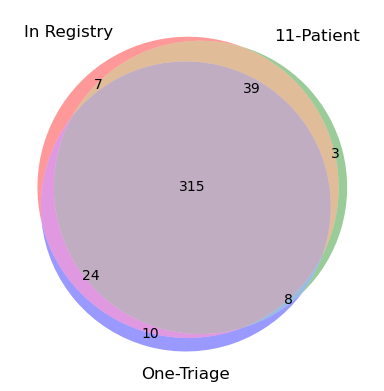

In [9]:

import matplotlib.pyplot as plt
from matplotlib_venn import venn3

registry_set = set(file_stats_df[file_stats_df.is_in_registry].session_uuid)
elevens_set = set(scene_stats_df[(scene_stats_df.patient_count == 11)].session_uuid)
ones_set = set(scene_stats_df[scene_stats_df.is_a_one_triage_file].session_uuid)

vd_obj = venn3([registry_set, elevens_set, ones_set], ('In Registry', '11-Patient', 'One-Triage'))
plt.show()

In [35]:

patch_dict = {}
for i in range(2):
    for j in range(2):
        for k in range(2):
            key = f'{i}{j}{k}'
            value = None
            if (key != '000'): value = vd_obj.get_patch_by_id(key).get_facecolor()
            patch_dict[key] = value
patch_dict

{'000': None, '001': (0.0, 0.0, 1.0, 0.4), '010': (0.0, 0.5, 0.0, 0.4), '011': (0.0, 0.35, 0.7, 0.4), '100': (1.0, 0.0, 0.0, 0.4), '101': (0.7, 0.0, 0.7, 0.4), '110': (0.7, 0.35, 0.0, 0.4), '111': (0.4, 0.2, 0.4, 0.4)}

In [43]:

label_dict = {}
for i in range(2):
    for j in range(2):
        for k in range(2):
            key = f'{i}{j}{k}'
            value = None
            if (key != '000'):
                value = vd_obj.get_label_by_id(key).get_text()
                in_registry = '' if (i == 1) else 'do not '
                eleven_patient = '' if (j == 1) else 'do not '
                one_triage = '' if (k == 1) else 'do not '
                print(
                    f'There are {value} files that {in_registry}belong to the Registry and {eleven_patient}have exactly eleven'
                    f' patients in them and {one_triage}have only one triage scene in them.'
                )
            label_dict[key] = value
label_dict

There are 10 files that do not belong to the Registry and do not have exactly eleven patients in them and have only one triage scene in them.
There are 3 files that do not belong to the Registry and have exactly eleven patients in them and do not have only one triage scene in them.
There are 8 files that do not belong to the Registry and have exactly eleven patients in them and have only one triage scene in them.
There are 7 files that belong to the Registry and do not have exactly eleven patients in them and do not have only one triage scene in them.
There are 24 files that belong to the Registry and do not have exactly eleven patients in them and have only one triage scene in them.
There are 39 files that belong to the Registry and have exactly eleven patients in them and do not have only one triage scene in them.
There are 315 files that belong to the Registry and have exactly eleven patients in them and have only one triage scene in them.


{'000': None, '001': '10', '010': '3', '011': '8', '100': '7', '101': '24', '110': '39', '111': '315'}

In [126]:

from matplotlib_venn import venn2

def draw_a_two_circle_venn_diagram(right_circle_tuple, ax=None):
    vd_obj = venn2([registry_set, right_circle_tuple[0]], ('In Registry', right_circle_tuple[1]), ax=ax)
    print()
    for i in range(2):
        for j in range(2):
            key = f'{i}{j}'
            if (key != '00'):
                text_obj = vd_obj.get_label_by_id(key)
                if text_obj is not None:
                    value = text_obj.get_text()
                    in_registry = '' if (i == 1) else 'do not '
                    right_circle = '' if (j == 1) else 'do not '
                    print(
                        f'There are {value} files that {in_registry}belong to the Registry and {right_circle}{right_circle_tuple[2]}.'
                    )

In [171]:

# ACTION ITEM: Create Venn diagrams combining the registry of already-cleaned-by-Doug files along the combinatorics of
# 11-patient, one-triage-scene files from 2023 that are not part of the jungle environment.
import matplotlib
from datetime import datetime
from math import ceil
from math import floor

registry_set = set(file_stats_df[file_stats_df.is_in_registry].session_uuid)
def plot_right_circles(tuples_list):
    plot_count = len(tuples_list)
    ncols = min(3, plot_count)
    nrows = max(1, int(ceil(plot_count / ncols)))
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4))
    # print(axes.shape)
    for i, right_circle_tuple in enumerate(tuples_list):
        col = (i % 3)
        if (nrows > 1):
            row = int(floor(i / 3))
            ax = axes[row, col]
        else: ax = axes[col]
        assert type(ax) == matplotlib.axes.Subplot, "You did something wrong"
        draw_a_two_circle_venn_diagram(right_circle_tuple, ax=ax)

    # Hide the unused axes
    for i in range(nrows * ncols, plot_count, -1):
        col = (i - 1) % 3
        if (nrows > 1):
            row = (i - 1) // 3
            ax = axes[row, col]
        else: ax = axes[i]
        ax.axis('off')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


There are 11 files that do not belong to the Registry and have exactly eleven patients in one of the scenes.
There are 31 files that belong to the Registry and do not have exactly eleven patients in one of the scenes.
There are 354 files that belong to the Registry and have exactly eleven patients in one of the scenes.

There are 18 files that do not belong to the Registry and have only one triage scene in them.
There are 46 files that belong to the Registry and do not have only one triage scene in them.
There are 339 files that belong to the Registry and have only one triage scene in them.

There are 1 files that do not belong to the Registry and have runs in 2023.
There are 150 files that belong to the Registry and do not have runs in 2023.
There are 235 files that belong to the Registry and have runs in 2023.

There are 15 files that do not belong to the Registry and run in the Jungle environment.
There are 385 files that belong to the Registry and do not run in the Jungle environm

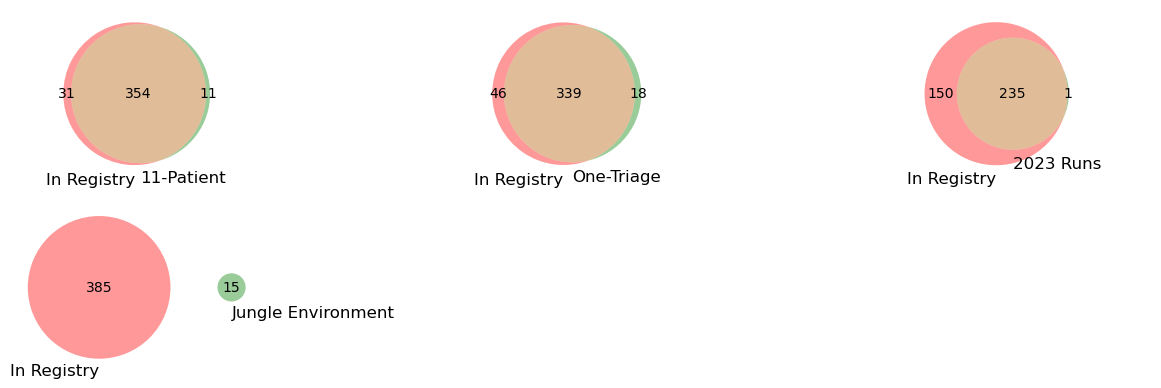

In [172]:

elevens_set = set(scene_stats_df[(scene_stats_df.patient_count == 11)].session_uuid)
ones_set = set(file_stats_df[file_stats_df.is_a_one_triage_file].session_uuid)
mask_series = scene_stats_df.session_file_week.map(lambda x: datetime.strptime(f'{str(x)[:4]}-W{str(x)[4:]}-1', '%Y-W%U-%w').date().year > 2022, na_action='ignore')
new_set = set(scene_stats_df[mask_series.fillna(False)].session_uuid)
jungle_set = set(file_stats_df[file_stats_df.scenario_environment == 'jungle'].session_uuid)
tuples_list = [
    (elevens_set, '11-Patient', 'have exactly eleven patients in one of the scenes'), (ones_set, 'One-Triage', 'have only one triage scene in them'),
    (new_set, '2023 Runs', 'have runs in 2023'), (jungle_set, 'Jungle Environment', 'run in the Jungle environment')
]
plot_right_circles(tuples_list)


There are 40 files that do not belong to the Registry and have missing responder types.
There are 318 files that belong to the Registry and do not have missing responder types.
There are 67 files that belong to the Registry and have missing responder types.

There are 40 files that do not belong to the Registry and have missing site names.
There are 330 files that belong to the Registry and do not have missing site names.
There are 55 files that belong to the Registry and have missing site names.

There are 40 files that do not belong to the Registry and have missing encounter layouts.
There are 330 files that belong to the Registry and do not have missing encounter layouts.
There are 55 files that belong to the Registry and have missing encounter layouts.


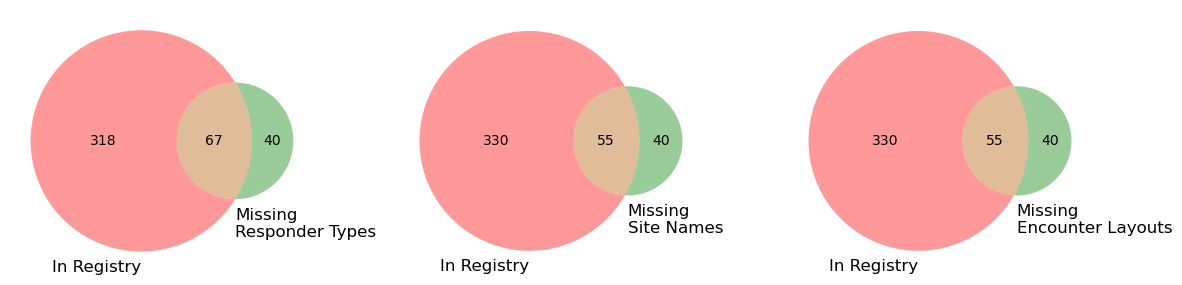

In [173]:

responder_type_set = set(file_stats_df[file_stats_df.responder_type.isnull()].session_uuid)
site_name_set = set(file_stats_df[file_stats_df.site_name.isnull()].session_uuid)
encounter_layout_set = set(file_stats_df[file_stats_df.encounter_layout.isnull()].session_uuid)
tuples_list = [
    (responder_type_set, 'Missing\nResponder Types', 'have missing responder types'), (site_name_set, 'Missing\nSite Names', 'have missing site names'),
    (encounter_layout_set, 'Missing\nEncounter Layouts', 'have missing encounter layouts')
]
plot_right_circles(tuples_list)